In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
pd.options.display.max_columns = None
df.head()

,short_name,latest_market_value,highest_market_value,current_club,position,main_position,secondary_position,age,height,league_country,foot,player_agent,outfitter,league,on_loan_from,contract_expires,appearances,goals,assists,yellow,second_yellow,red,minutes_played,goals_conceded,clean_sheets,last_appearances,last_goals,last_yellow,last_second_yellow,last_red,last_goals_conceded,last_clean_sheets,last_assists,last_minutes_played,country,country_2
0,Ederson,61600000.0,77000000.0,Manchester City,Goalkeeper,Goalkeeper,0,27.0,1.88,England,left,Gestifute,Nike,Premier League,0,30.06.2025,44,0,0,3,0,1,3837,37,20,55,0,3,0,0,38,28,0,4980,Brazil,1
1,Zack Steffen,6600000.0,11000000.0,Manchester City,Goalkeeper,Goalkeeper,0,25.0,1.91,England,right,Wasserman,unknown,Premier League,0,0,18,0,0,0,0,0,1650,37,2,13,0,0,0,0,17,4,0,1170,United States,0
2,Arijanet Muric,1980000.0,2200000.0,Manchester City,Goalkeeper,Goalkeeper,0,21.0,1.98,England,right,11WINS,unknown,Premier League,0,30.06.2024,5,0,0,0,0,0,450,9,1,7,0,0,0,0,2,5,0,660,Kosovo,1
3,Claudio Bravo,1320000.0,16500000.0,Manchester City,Goalkeeper,Goalkeeper,0,37.0,1.84,England,right,unknown,adidas,Premier League,0,24.08.2020,17,0,0,0,0,1,1461,16,5,1,0,0,0,0,0,1,0,90,Chile,1
4,Scott Carson,880000.0,6600000.0,Manchester City,Goalkeeper,Goalkeeper,0,34.0,1.88,England,right,Wasserman,unknown,Premier League,1,31.05.2021,0,0,0,0,0,0,0,0,0,33,0,1,0,0,45,6,0,2970,England,0


In [4]:
#Creating per game metrics and sent off stat

df['goals_per_game'] = df['goals'] / df['appearances']
df['assists_per_game'] = df['assists'] / df['appearances']
df['minutes_per_game'] = df['minutes_played'] / df['appearances']
df['sent_off'] = df['second_yellow'] + df['red']
df['goalsconceded_per_game'] = df['goals_conceded'] / df['appearances']

#Same thing with last season

df['last_goals_per_game'] = df['last_goals'] / df['last_appearances']
df['last_assists_per_game'] = df['last_assists'] / df['last_appearances']
df['last_minutes_per_game'] = df['last_minutes_played'] / df['last_appearances']
df['last_sent_off'] = df['last_second_yellow'] + df['last_red']
df['last_goalsconceded_per_game'] = df['last_goals_conceded'] / df['last_appearances']

new_metrics = ['goals_per_game', 
    'assists_per_game', 'minutes_per_game', 'goalsconceded_per_game','sent_off', 
               'last_goals_per_game', 'last_assists_per_game', 'last_minutes_per_game', 
    'last_sent_off', 'last_goalsconceded_per_game']

df[new_metrics] = df[new_metrics].fillna(0)
new_metrics.remove('sent_off')
new_metrics.remove('last_sent_off')

In [5]:
pd.options.display.max_columns = None
df.head()

,short_name,latest_market_value,highest_market_value,current_club,position,main_position,secondary_position,age,height,league_country,foot,player_agent,outfitter,league,on_loan_from,contract_expires,appearances,goals,assists,yellow,second_yellow,red,minutes_played,goals_conceded,clean_sheets,last_appearances,last_goals,last_yellow,last_second_yellow,last_red,last_goals_conceded,last_clean_sheets,last_assists,last_minutes_played,country,country_2,goals_per_game,assists_per_game,minutes_per_game,sent_off,goalsconceded_per_game,last_goals_per_game,last_assists_per_game,last_minutes_per_game,last_sent_off,last_goalsconceded_per_game
0,Ederson,61600000.0,77000000.0,Manchester City,Goalkeeper,Goalkeeper,0,27.0,1.88,England,left,Gestifute,Nike,Premier League,0,30.06.2025,44,0,0,3,0,1,3837,37,20,55,0,3,0,0,38,28,0,4980,Brazil,1,0.0,0.0,87.204545,1,0.840909,0.0,0.0,90.545455,0,0.690909
1,Zack Steffen,6600000.0,11000000.0,Manchester City,Goalkeeper,Goalkeeper,0,25.0,1.91,England,right,Wasserman,unknown,Premier League,0,0,18,0,0,0,0,0,1650,37,2,13,0,0,0,0,17,4,0,1170,United States,0,0.0,0.0,91.666667,0,2.055556,0.0,0.0,90.000000,0,1.307692
2,Arijanet Muric,1980000.0,2200000.0,Manchester City,Goalkeeper,Goalkeeper,0,21.0,1.98,England,right,11WINS,unknown,Premier League,0,30.06.2024,5,0,0,0,0,0,450,9,1,7,0,0,0,0,2,5,0,660,Kosovo,1,0.0,0.0,90.000000,0,1.800000,0.0,0.0,94.285714,0,0.285714
3,Claudio Bravo,1320000.0,16500000.0,Manchester City,Goalkeeper,Goalkeeper,0,37.0,1.84,England,right,unknown,adidas,Premier League,0,24.08.2020,17,0,0,0,0,1,1461,16,5,1,0,0,0,0,0,1,0,90,Chile,1,0.0,0.0,85.941176,1,0.941176,0.0,0.0,90.000000,0,0.000000
4,Scott Carson,880000.0,6600000.0,Manchester City,Goalkeeper,Goalkeeper,0,34.0,1.88,England,right,Wasserman,unknown,Premier League,1,31.05.2021,0,0,0,0,0,0,0,0,0,33,0,1,0,0,45,6,0,2970,England,0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,90.000000,0,1.363636


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9340 entries, 0 to 9339
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   9340 non-null   object 
 1   latest_market_value          9340 non-null   float64
 2   highest_market_value         9340 non-null   float64
 3   current_club                 9340 non-null   object 
 4   position                     9340 non-null   object 
 5   main_position                9340 non-null   object 
 6   secondary_position           9340 non-null   int64  
 7   age                          9340 non-null   float64
 8   height                       9340 non-null   float64
 9   league_country               9340 non-null   object 
 10  foot                         9340 non-null   object 
 11  player_agent                 9340 non-null   object 
 12  outfitter                    9340 non-null   object 
 13  league            

In [7]:
#Attesting there are no null values
df.isna().mean().sort_values().sum()

0.0

In [8]:
#Option to see full columns
pd.options.display.max_columns = None
df.describe().round(2)

,latest_market_value,highest_market_value,secondary_position,age,height,on_loan_from,appearances,goals,assists,yellow,second_yellow,red,minutes_played,goals_conceded,clean_sheets,last_appearances,last_goals,last_yellow,last_second_yellow,last_red,last_goals_conceded,last_clean_sheets,last_assists,last_minutes_played,country_2,goals_per_game,assists_per_game,minutes_per_game,sent_off,goalsconceded_per_game,last_goals_per_game,last_assists_per_game,last_minutes_per_game,last_sent_off,last_goalsconceded_per_game
count,9.340000e+03,9.340000e+03,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00,9340.00
mean,3.889939e+06,5.993441e+06,0.74,25.77,1.83,0.04,21.55,2.40,1.76,3.18,0.10,0.07,1548.25,2.18,0.48,24.31,2.91,3.43,0.10,0.08,2.46,0.61,2.03,1801.84,0.23,0.09,0.07,66.31,0.16,0.13,0.10,0.07,68.37,0.18,0.12
std,1.007317e+07,1.383238e+07,0.44,4.35,0.07,0.21,11.86,3.94,2.61,2.95,0.32,0.27,996.32,8.58,2.08,12.48,4.49,3.09,0.32,0.29,9.40,2.54,2.85,1073.04,0.42,0.13,0.09,23.04,0.42,0.44,0.14,0.09,22.87,0.44,0.41
min,1.100000e+05,1.100000e+05,0.00,15.00,1.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.300000e+05,4.400000e+05,0.00,22.00,1.78,0.00,13.00,0.00,0.00,1.00,0.00,0.00,737.00,0.00,0.00,16.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,966.75,0.00,0.00,0.00,54.91,0.00,0.00,0.00,0.00,58.52,0.00,0.00
50%,6.600000e+05,1.100000e+06,1.00,25.00,1.83,0.00,22.00,1.00,1.00,3.00,0.00,0.00,1486.00,0.00,0.00,26.00,1.00,3.00,0.00,0.00,0.00,0.00,1.00,1825.00,0.00,0.04,0.04,72.71,0.00,0.00,0.05,0.04,75.54,0.00,0.00
75%,2.640000e+06,4.747500e+06,1.00,29.00,1.87,0.00,30.00,3.00,3.00,5.00,0.00,0.00,2273.00,0.00,0.00,33.00,4.00,5.00,0.00,0.00,0.00,0.00,3.00,2603.00,0.00,0.13,0.11,84.15,0.00,0.00,0.14,0.11,85.57,0.00,0.00
max,1.980000e+08,2.200000e+08,1.00,42.00,2.04,1.00,57.00,55.00,26.00,20.00,3.00,3.00,5130.00,76.00,29.00,66.00,51.00,21.00,3.00,3.00,85.00,28.00,24.00,5777.00,1.00,1.50,1.00,120.00,3.00,4.00,2.00,2.00,120.00,5.00,5.00


# Analyzing general stats

In [9]:
#How many observations there are for each position
df['main_position'].value_counts()

Centre-Back           1610
Centre-Forward        1242
Central Midfield      1052
Goalkeeper             970
Right-Back             768
Defensive Midfield     767
Left-Back              703
Left Winger            631
Right Winger           601
Attacking Midfield     580
Right Midfield         174
Left Midfield          168
Second Striker          74
Name: main_position, dtype: int64

In [10]:
#Latest market value by nationality
(df['latest_market_value'].groupby(df['country']).sum().round(2).sort_values(ascending = False)/100)[:10]

country
France         40877860.0
Spain          36783930.0
England        31634650.0
Brazil         27209510.0
Germany        22365400.0
Italy          17601480.0
Portugal       15593450.0
Netherlands    13875700.0
Argentina      13247150.0
Belgium        11877460.0
Name: latest_market_value, dtype: float64

In [11]:
#Foot % in the players data
df['foot'].value_counts(normalize = True).round(4)*100

right    72.11
left     22.41
both      5.48
Name: foot, dtype: float64

In [12]:
#Market value by league
df['latest_market_value'].groupby(df['league']).sum().round(2).sort_values(ascending = False)/100

league
Premier League             91666050.0
LaLiga                     59438490.0
Serie A                    49905160.0
Bundesliga_Germany         48882460.0
Ligue 1                    35414970.0
Liga NOS                   12941600.0
Premier Liga_Russia         9965810.0
Eredivisie                  9799720.0
Jupiler Pro League          7456390.0
SÃ¼per Lig                  5808460.0
Bundesliga_Austria          3171110.0
Premier Liga_Ukraine        3100200.0
Super League 1              2879040.0
Scottish Premiership        2533700.0
Super League                2404840.0
Superligaen                 2213750.0
Fortuna Liga                2195750.0
1.HNL                       2174310.0
Super liga Srbije           2027060.0
PKO Ekstraklasa             2014120.0
Liga 1                      1758980.0
Allsvenskan                 1725130.0
efbet Liga                  1327360.0
Eliteserien                 1261710.0
Premier Liga_Kazakhstan     1254100.0
Name: latest_market_value, dtype: float64

In [13]:
#sent off by league
df['sent_off'].groupby(df['league']).sum().round(2).sort_values(ascending = False)

league
Serie A                    116
LaLiga                     116
SÃ¼per Lig                 110
Liga NOS                   101
Ligue 1                     94
Premier Liga_Russia         84
Bundesliga_Germany          78
PKO Ekstraklasa             69
Super League 1              68
Premier League              68
Premier Liga_Ukraine        66
Liga 1                      61
Eredivisie                  59
Jupiler Pro League          59
Fortuna Liga                56
1.HNL                       50
Super liga Srbije           45
Superligaen                 45
Bundesliga_Austria          44
Super League                42
Scottish Premiership        34
Allsvenskan                 25
efbet Liga                  22
Premier Liga_Kazakhstan     14
Eliteserien                 14
Name: sent_off, dtype: int64

In [14]:
#goals by league
df['goals'].groupby(df['league']).sum().round(2).sort_values(ascending = False)

league
Premier League             1744
Bundesliga_Germany         1598
Serie A                    1482
LaLiga                     1481
Ligue 1                    1142
SÃ¼per Lig                 1140
Eredivisie                 1120
Fortuna Liga               1084
Liga NOS                   1059
PKO Ekstraklasa            1028
Premier Liga_Russia         901
Superligaen                 899
Jupiler Pro League          865
Scottish Premiership        814
Bundesliga_Austria          749
Super League 1              738
Liga 1                      730
Super League                642
Super liga Srbije           640
Premier Liga_Ukraine        613
1.HNL                       589
Allsvenskan                 550
Eliteserien                 402
efbet Liga                  266
Premier Liga_Kazakhstan     153
Name: goals, dtype: int64

In [15]:
#clean sheets by league
df['clean_sheets'].groupby(df['league']).sum().round(2).sort_values(ascending = False)

league
Premier League             378
LaLiga                     335
Ligue 1                    279
Bundesliga_Germany         253
Fortuna Liga               239
Liga NOS                   239
Serie A                    239
PKO Ekstraklasa            206
SÃ¼per Lig                 204
Super League 1             199
Eredivisie                 198
Premier Liga_Russia        185
Jupiler Pro League         160
Superligaen                158
Liga 1                     151
Super liga Srbije          148
Scottish Premiership       143
1.HNL                      139
Bundesliga_Austria         116
Super League               112
Premier Liga_Ukraine       110
Allsvenskan                110
efbet Liga                  79
Eliteserien                 76
Premier Liga_Kazakhstan     31
Name: clean_sheets, dtype: int64

In [16]:
#club players market value
(df['latest_market_value'].groupby(df['current_club']).sum().round(2).sort_values(ascending = False)/100)[:20]

current_club
Real Madrid            11697400.0
Manchester City        11581630.0
Liverpool FC           11207900.0
FC Barcelona           10888900.0
Bayern Munich          10172250.0
Chelsea FC              8915500.0
Paris Saint-Germain     8793950.0
AtlÃ©tico Madrid        8493100.0
Manchester United       8270630.0
Tottenham Hotspur       7752800.0
Juventus FC             6712200.0
Arsenal FC              6589550.0
Borussia Dortmund       6393750.0
Inter Milan             6277150.0
SSC Napoli              5880600.0
RB Leipzig              5582780.0
Leicester City          4931300.0
Everton FC              4492400.0
Bayer 04 Leverkusen     4363150.0
SL Benfica              4173400.0
Name: latest_market_value, dtype: float64

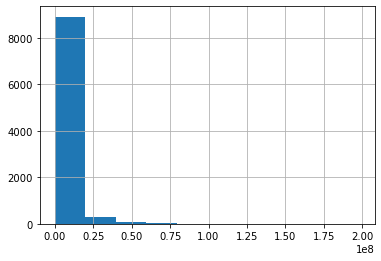

In [17]:
df.latest_market_value.hist()

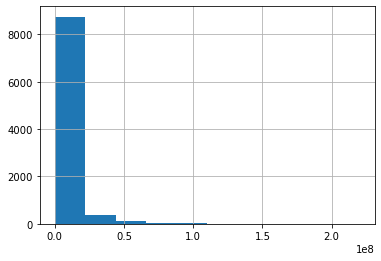

In [18]:
df.highest_market_value.hist()

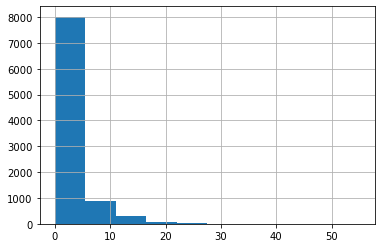

In [19]:
df.goals.hist()

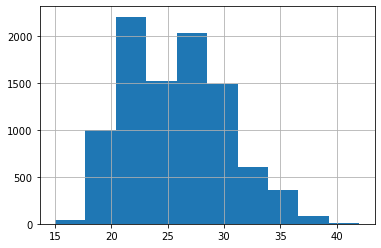

In [20]:
df.age.hist()

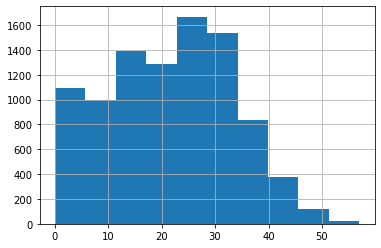

In [21]:
df.appearances.hist()

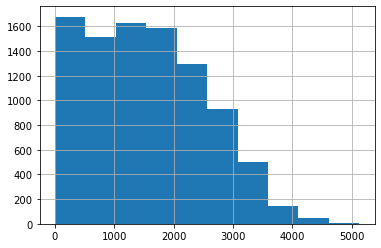

In [22]:
df.minutes_played.hist()

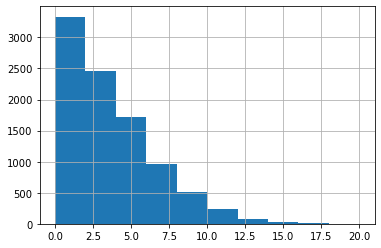

In [23]:
df.yellow.hist()

# Analyzing per game stats by league

### These stats must be understood as an average of player per game stats, since we are calculating a mean of the per game stats for each league.

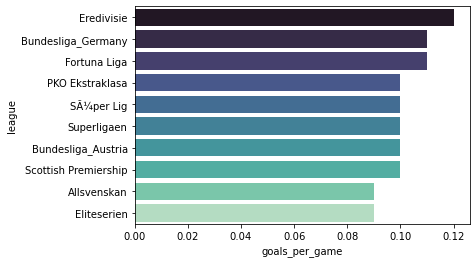

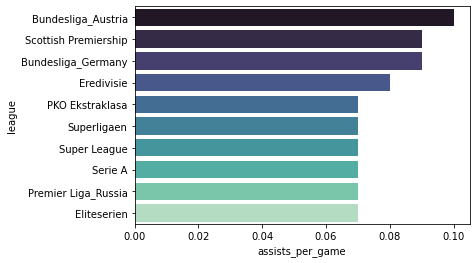

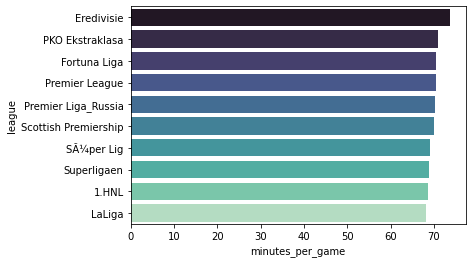

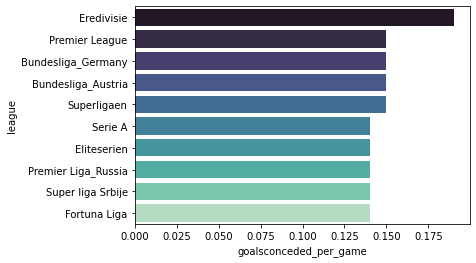

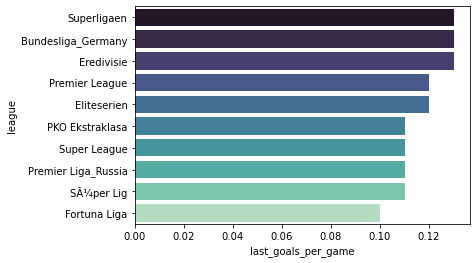

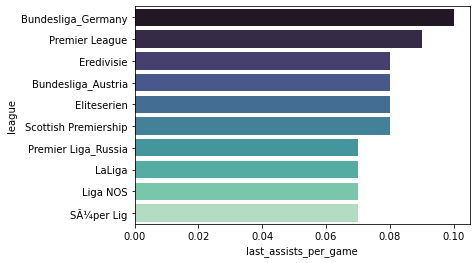

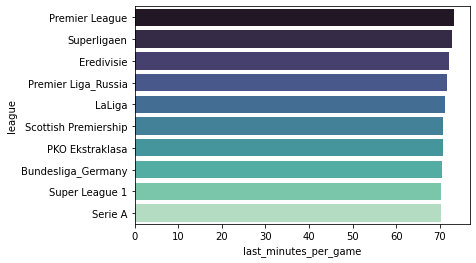

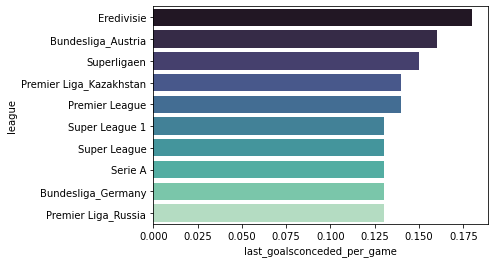

In [24]:
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

#Code by: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/data_eda.ipynb
for i in new_metrics:
    cat_num = df[i].groupby(df['league']).mean().round(2).sort_values(ascending = False)[:10]
    chart = sns.barplot(y=cat_num.index, x=cat_num, palette = 'mako')
    plt.show()

# Analyzing per game stats by player

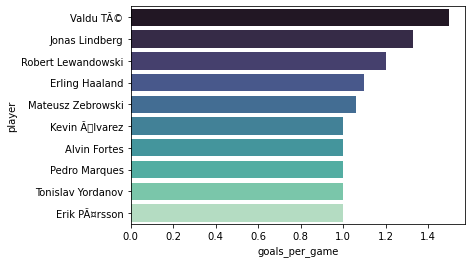

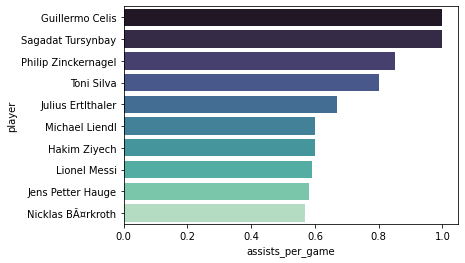

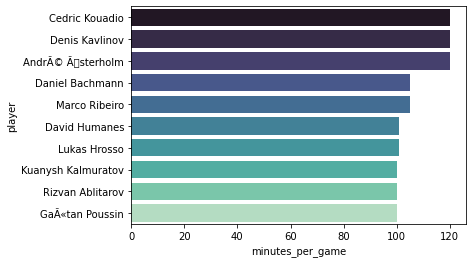

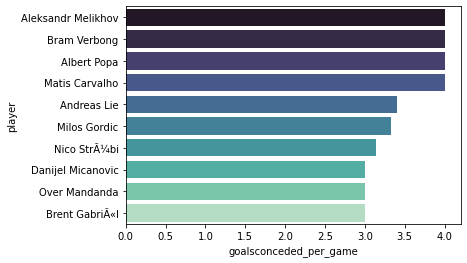

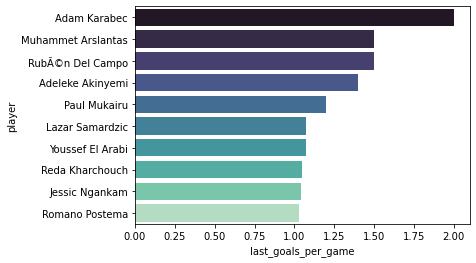

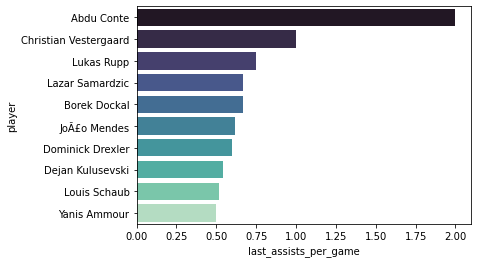

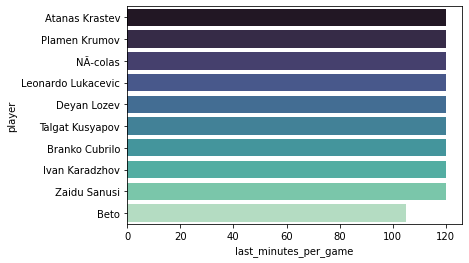

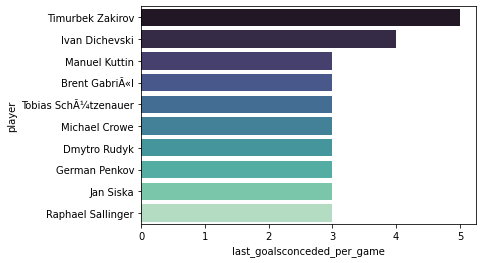

In [30]:
#Code by: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/data_eda.ipynb

#there may be an error in this cell because of a font problem, if needed just remove the "set_ylabel" line
for i in new_metrics:
    cat_num = df[['short_name', i]].round(2).sort_values(by = i, ascending = False)[:10]
    chart = sns.barplot(y=cat_num.iloc[:,0], x=cat_num.iloc[:,1], palette="mako")
    chart.set_ylabel('player')
    plt.show()

# A glince at correlation

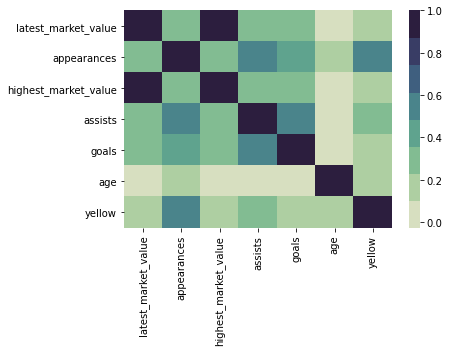

In [26]:
#correlation for some of the numerical variables
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75)
sns.heatmap(df[['latest_market_value', 'appearances', 'highest_market_value','assists','goals', 'age', 'yellow']].corr(), cmap=cmap)

In [27]:
#correlation of the column "latest_market_value" with the rest of the variables
df.corr()['latest_market_value'].sort_values(ascending = False).round(2)

latest_market_value            1.00
highest_market_value           0.94
appearances                    0.36
assists                        0.35
minutes_played                 0.34
goals                          0.33
last_assists                   0.31
last_appearances               0.30
last_goals                     0.29
last_minutes_played            0.28
assists_per_game               0.21
last_assists_per_game          0.20
goals_per_game                 0.19
last_goals_per_game            0.17
yellow                         0.17
last_yellow                    0.14
minutes_per_game               0.10
country_2                      0.09
last_minutes_per_game          0.09
secondary_position             0.05
last_red                       0.05
last_sent_off                  0.04
clean_sheets                   0.03
sent_off                       0.03
red                            0.03
last_clean_sheets              0.02
second_yellow                  0.01
last_second_yellow          

Clearly there is no considerable correlation between the column of "latest_market_value" that we would predict and the other columns in the dataframe, except for the "highest_market_value" column, which is not coherent.

In [28]:
#exporting to csv
df.to_csv('eda_df.csv')